In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('/kaggle/input/finaldata/combined_vader_textblob_classified_data.csv', encoding="ISO-8859-1")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (1,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data

,username,verified,followersCount,rawContent,date,replyCount,retweetCount,likeCount,url,hashtags,...,vader_preprocessing_text,vader_neg,vader_neu,vader_pos,vader_comp,class,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,final_class
0,G_F758,False,343,Hogwarts Legacy Flight the Good Flight (SILVER...,18/2/2023 12:47,0,0,1.0,https://twitter.com/G_F758/status/162692648616...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,hogwarts legacy flight the good flight (silver...,0.000,0.674,0.326,0.4404,1,0.600000,0.700000,1,0.0
1,DeVinSimmons,False,421,Oh and how smooth getting on and off the broom...,16/2/2023 5:27,0,0,0.0,https://twitter.com/DeVinSimmons/status/162609...,['HogwartsLegacy'],...,oh and how smooth getting on and off the broom...,0.000,1.000,0.000,0.0000,0,0.500000,0.400000,1,0.0
2,cozzboz,False,117,Playing endless hours of #HogwartsLegacy got m...,16/2/2023 14:34,0,0,0.0,https://twitter.com/cozzboz/status/16262284309...,['HogwartsLegacy'],...,playing endless hours of got me in the mood f...,0.000,0.904,0.096,0.2023,1,0.575000,-0.062500,-1,0.0
3,Fantastic_4ork,False,486,Hey #AvalancheSoftware how about that #photomo...,15/2/2023 19:24,0,0,3.0,https://twitter.com/Fantastic_4ork/status/1625...,"['AvalancheSoftware', 'photomode', 'hogwartsle...",...,hey how about that for ? adegaa$?a*adegaaa ...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
4,jordan_sebas2,False,487,Hogwarts Legacy Flight the Good Flight (SILVER...,15/2/2023 19:57,0,0,0.0,https://twitter.com/jordan_sebas2/status/16259...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,hogwarts legacy flight the good flight (silver...,0.000,0.530,0.470,0.7964,1,0.533333,0.266667,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79545,Abfun77,False,382,Video of ELDEN RING: All Quests in Order + Mis...,22/2/2023 0:17,0,7,79.0,https://twitter.com/Abfun77/status/16281871857...,"['ELDENRING', 'ELDEN_RING', 'guide', 'gaming',...",...,video of elden ring: all quests in order + mis...,0.000,1.000,0.000,0.0000,0,0.767857,0.142857,1,0.0
79546,Vivern96,False,7,Red Wolf of Radagon RL1 NoHit #ELDEN_RING #ELD...,16/6/2022 14:29,0,0,1.0,https://twitter.com/Vivern96/status/1537442134...,"['ELDEN_RING', 'ELDENRING', 'gaming', 'game']",...,red wolf of radagon rl1 nohit,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
79547,EllieCupcakes,False,263,Fanart of Miruku with her Apostle (Slim) and M...,3/3/2023 21:01,1,7,32.0,https://twitter.com/EllieCupcakes/status/16317...,"['EldenRing', 'EldenRingArt']",...,fanart of miruku with her apostle (slim) and m...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
79548,Pinknotess,False,0,This comic is definitely worth reading! Come c...,19/3/2023 3:42,0,0,0.0,https://twitter.com/Pinknotess/status/16372984...,"['EldenRing', 'illusrtationart', 'Romance']",...,this comic is definitely worth reading! come c...,0.000,0.607,0.393,0.6351,1,0.300000,0.359375,1,1.0


In [4]:
train=data[data['labels'].isnull()]

In [5]:
train.head()

,username,verified,followersCount,rawContent,date,replyCount,retweetCount,likeCount,url,hashtags,...,vader_preprocessing_text,vader_neg,vader_neu,vader_pos,vader_comp,class,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,final_class
713,b3llb0y_gaming,False,317,Sneaking up on a Troll? #HogwartLegacy @Hogwar...,12/2/2023 5:03,1,0,1.0,https://twitter.com/b3llb0y_gaming/status/1624...,['HogwartLegacy'],...,sneaking up on a troll?,0.000,1.000,0.000,0.0000,0,0.0,0.0,0,0.0
835,kianajenw,False,36,happy friday ÃÂ°ÃÂÃÂ¤ÃÂ #PS5Share #Hogwa...,18/2/2023 0:15,0,0,2.0,https://twitter.com/kianajenw/status/162673710...,"['PS5Share', 'HogwartsLegacy']",...,happy friday adegaa$?a,0.000,0.351,0.649,0.5719,1,1.0,0.8,1,1.0
858,jnetworkgames,False,1,#HogwartsLegacy developer #AvalancheSoftware h...,18/2/2023 15:03,0,0,1.0,https://twitter.com/jnetworkgames/status/16269...,"['HogwartsLegacy', 'AvalancheSoftware']",...,developer has no current plans to release an...,0.196,0.804,0.000,-0.2960,-1,0.4,0.0,0,-1.0
859,jamesdollface,False,7,i could fix him #HogwartsLegacy https://t.co/o...,16/2/2023 22:36,0,0,0.0,https://twitter.com/jamesdollface/status/16263...,['HogwartsLegacy'],...,i could fix him,0.000,1.000,0.000,0.0000,0,0.0,0.0,0,0.0
860,onthejs_YT,False,4,HOGWARTS LEGACY PART 1 https://t.co/ATy8SYwAsn...,12/2/2023 5:59,0,0,0.0,https://twitter.com/onthejs_YT/status/16246492...,['HogwartLegacy'],...,hogwarts legacy part 1,0.000,1.000,0.000,0.0000,0,0.0,0.0,0,0.0


In [6]:
train = train[train['vader_preprocessing_text'].notnull()]
data['labels'].value_counts()

 0.0    4340
 1.0    1175
-1.0     578
Name: labels, dtype: int64

In [7]:
train['final_class'].value_counts()

 1.0    26436
 0.0    25551
-1.0    21470
Name: final_class, dtype: int64

In [8]:
test=data[data['labels'].notnull()]

In [9]:
test = test[test['vader_preprocessing_text'].notnull()]

In [10]:
test

,username,verified,followersCount,rawContent,date,replyCount,retweetCount,likeCount,url,hashtags,...,vader_preprocessing_text,vader_neg,vader_neu,vader_pos,vader_comp,class,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,final_class
0,G_F758,False,343,Hogwarts Legacy Flight the Good Flight (SILVER...,18/2/2023 12:47,0,0,1.0,https://twitter.com/G_F758/status/162692648616...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,hogwarts legacy flight the good flight (silver...,0.000,0.674,0.326,0.4404,1,0.600000,0.700000,1,0.0
1,DeVinSimmons,False,421,Oh and how smooth getting on and off the broom...,16/2/2023 5:27,0,0,0.0,https://twitter.com/DeVinSimmons/status/162609...,['HogwartsLegacy'],...,oh and how smooth getting on and off the broom...,0.000,1.000,0.000,0.0000,0,0.500000,0.400000,1,0.0
2,cozzboz,False,117,Playing endless hours of #HogwartsLegacy got m...,16/2/2023 14:34,0,0,0.0,https://twitter.com/cozzboz/status/16262284309...,['HogwartsLegacy'],...,playing endless hours of got me in the mood f...,0.000,0.904,0.096,0.2023,1,0.575000,-0.062500,-1,0.0
3,Fantastic_4ork,False,486,Hey #AvalancheSoftware how about that #photomo...,15/2/2023 19:24,0,0,3.0,https://twitter.com/Fantastic_4ork/status/1625...,"['AvalancheSoftware', 'photomode', 'hogwartsle...",...,hey how about that for ? adegaa$?a*adegaaa ...,0.000,1.000,0.000,0.0000,0,0.000000,0.000000,0,0.0
4,jordan_sebas2,False,487,Hogwarts Legacy Flight the Good Flight (SILVER...,15/2/2023 19:57,0,0,0.0,https://twitter.com/jordan_sebas2/status/16259...,"['PlayStationTrophy', 'PS5Share', 'HogwartsLeg...",...,hogwarts legacy flight the good flight (silver...,0.000,0.530,0.470,0.7964,1,0.533333,0.266667,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70890,eldenringjurny,False,39,@JoanSGarrison That is amazing,24/8/2022 23:01,0,0,1.0,https://twitter.com/eldenringjurny/status/1562...,NaN,...,that is amazing,0.000,0.345,0.655,0.5859,1,0.900000,0.600000,1,0.0
70891,DDyutams,False,12,"Hello, #EldenRing #EldenRing2022 #EldenRingPS5...",27/2/2022 5:51,0,0,0.0,https://twitter.com/DDyutams/status/1497811662...,"['EldenRing', 'EldenRing2022', 'EldenRingPS5',...",...,"hello, part 1 is up. for real time upd...",0.000,1.000,0.000,0.0000,0,0.316667,0.183333,1,0.0
70892,BDP_Unashamed,False,407,We all need a little guidance. #eldenring #PS4...,17/3/2023 17:13,0,0,0.0,https://twitter.com/BDP_Unashamed/status/16367...,"['eldenring', 'PS4share']",...,we all need a little guidance.,0.000,1.000,0.000,0.0000,0,0.500000,-0.187500,-1,0.0
70893,eldenringjurny,False,39,@IronPineapple_ I don't play online. Are they ...,17/3/2022 15:56,0,0,0.0,https://twitter.com/eldenringjurny/status/1504...,NaN,...,i do not play online. are they worth getting ...,0.218,0.554,0.228,0.0423,-1,0.100000,0.300000,1,0.0


In [11]:
tfidf=TfidfVectorizer()
tweet_tfidf_train=tfidf.fit_transform(train['processed'])

In [12]:
MNB=MultinomialNB()
MNB.fit(tweet_tfidf_train,train['final_class'])

MultinomialNB()

In [13]:
tweet_tfidf_eval=tfidf.transform(test['processed'])
predicted=MNB.predict(tweet_tfidf_eval)
accuracy_score=metrics.accuracy_score(predicted,test['labels'])

In [14]:
precision = round(metrics.precision_score(test['labels'],predicted, average="weighted"), 3)
recall = round(metrics.recall_score(test['labels'],predicted, average="weighted"), 3)
nb_f1_score = round(metrics.f1_score(test['labels'], predicted, average="weighted"), 3)

In [15]:
print("Accuracy: ", accuracy_score)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", nb_f1_score)

Accuracy:  0.3236500902675201
Precision:  0.663
Recall:  0.324
F1_score:  0.339


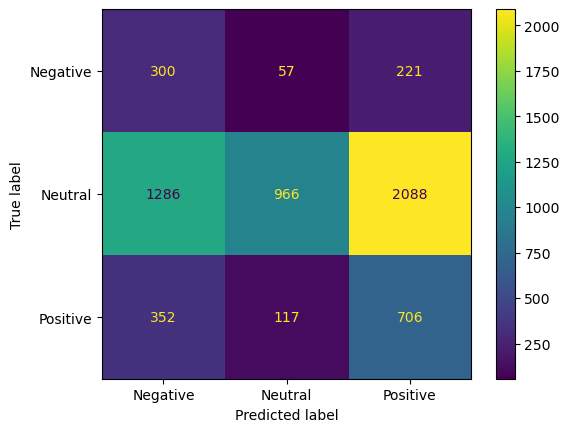

In [16]:
cm = confusion_matrix(test['labels'].astype('int'), predicted)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Neutral','Positive'])
cmd.plot()

In [17]:
tfidf=TfidfVectorizer()
tweet_tfidf_train=tfidf.fit_transform(train['processed'])

tweet_tfidf_eval=tfidf.transform(test['processed'])
rf = RandomForestClassifier()
scores = cross_val_score(rf,tweet_tfidf_train,train['final_class'],cv=5)

In [18]:
print(scores)
scores.mean()

[0.75176967 0.79158726 0.68640664 0.72820094 0.74998298]


0.7415894989186721

In [19]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [20]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5,50,100],
    'max_depth': [2,10,20,None]
}

cv = GridSearchCV(rf,parameters)
cv.fit(tweet_tfidf_train,train['final_class'])
print_results(cv)

BEST PARAMS: {'max_depth': None, 'n_estimators': 100}

0.395 (+/-0.059) for {'max_depth': 2, 'n_estimators': 5}
0.386 (+/-0.076) for {'max_depth': 2, 'n_estimators': 50}
0.414 (+/-0.058) for {'max_depth': 2, 'n_estimators': 100}
0.494 (+/-0.028) for {'max_depth': 10, 'n_estimators': 5}
0.567 (+/-0.081) for {'max_depth': 10, 'n_estimators': 50}
0.563 (+/-0.071) for {'max_depth': 10, 'n_estimators': 100}
0.536 (+/-0.064) for {'max_depth': 20, 'n_estimators': 5}
0.615 (+/-0.044) for {'max_depth': 20, 'n_estimators': 50}
0.622 (+/-0.097) for {'max_depth': 20, 'n_estimators': 100}
0.639 (+/-0.047) for {'max_depth': None, 'n_estimators': 5}
0.728 (+/-0.061) for {'max_depth': None, 'n_estimators': 50}
0.738 (+/-0.068) for {'max_depth': None, 'n_estimators': 100}


In [21]:
rf3 = RandomForestClassifier(n_estimators=100,max_depth=None)
rf3.fit(tweet_tfidf_train,train['final_class'])

RandomForestClassifier()

In [22]:
y_pred = rf3.predict(tweet_tfidf_eval)
accuracy = round(metrics.accuracy_score(test['labels'],y_pred), 3)
precision = round(metrics.precision_score(test['labels'],y_pred,average="weighted"), 3)
recall = round(metrics.recall_score(test['labels'],y_pred,average="weighted"), 3)
rf_f1_score = round(metrics.f1_score(test['labels'], y_pred, average="weighted"), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf3.max_depth,
                                                                         rf3.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: None / # OF EST: 100 -- A: 0.45 / P: 0.624 / R: 0.45


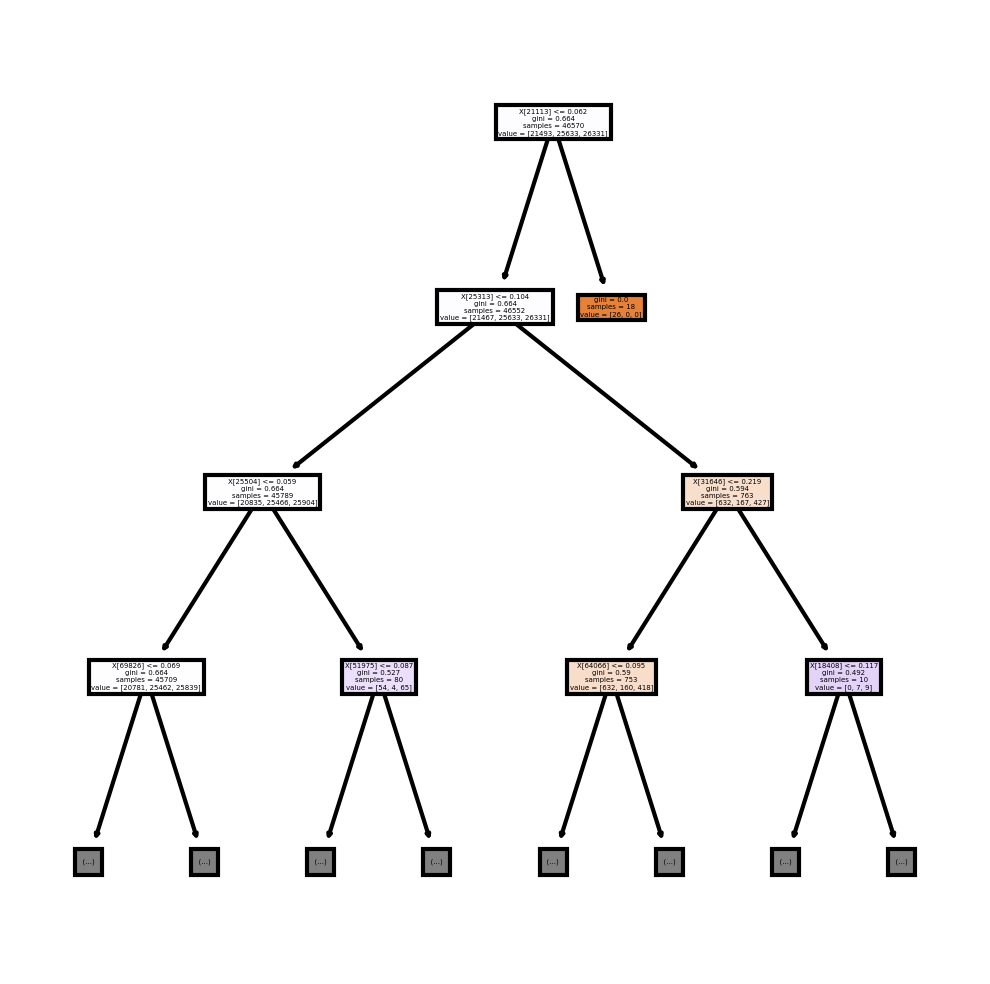

In [25]:
from sklearn.tree import plot_tree

# Get one of the decision trees from the Random Forest
estimator = rf3.estimators_[0]

# Plot the decision tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
plot_tree(estimator, filled=True, max_depth=3)
plt.show()

In [26]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", rf_f1_score)

Accuracy:  0.45
Precision:  0.624
Recall:  0.45
F1_score:  0.494


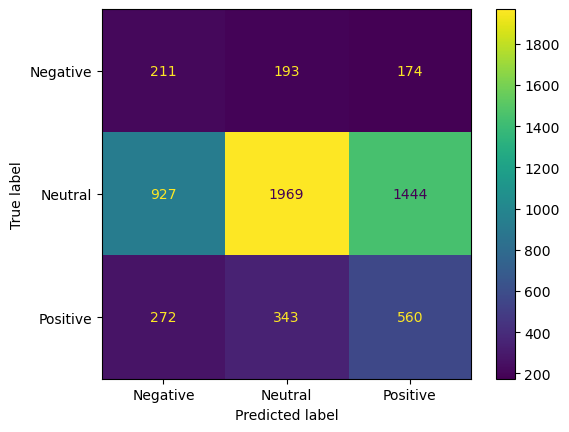

In [27]:
cm = confusion_matrix(test['labels'].astype('int'), y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Neutral','Positive'])
cmd.plot() 